In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading and saving datasets. i.e. train, test, and validation
splits = {'train': 'train.csv', 'validation': 'validation.csv', 'test': 'test.csv'}
train_data = pd.read_csv("hf://datasets/aai510-group1/telco-customer-churn/" + splits["train"])
train_data.to_csv("./data/train.csv")
test_data = pd.read_csv("hf://datasets/aai510-group1/telco-customer-churn/" + splits["test"])
test_data.to_csv("./data/test.csv")
validation_data = pd.read_csv("hf://datasets/aai510-group1/telco-customer-churn/" + splits["validation"])
validation_data.to_csv("./data/validation.csv")

/home/kushal-patel/My Space/NCSU/CSC 522 - ALDA/Project/Cutomer-Churn-Prediction/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Basic Data Analysis and Data Cleaning

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

In [4]:
train_data["Quarter"].unique()

array(['Q3'], dtype=object)

In [5]:
train_data["Churn"].value_counts()

Churn
0    3104
1    1121
Name: count, dtype: int64

In [6]:
train_data["Churn Reason"].unique()

array([nan, 'Network reliability', 'Competitor had better devices',
       'Price too high', 'Competitor offered higher download speeds',
       'Competitor offered more data', 'Attitude of support person',
       'Competitor made better offer', "Don't know",
       'Attitude of service provider', 'Limited range of services',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support',
       'Lack of affordable download/upload speed',
       'Service dissatisfaction', 'Moved',
       'Lack of self-service on Website',
       'Poor expertise of phone support', 'Extra data charges',
       'Deceased'], dtype=object)

In [7]:
train_data.drop(columns=["Customer ID", "Country", "Quarter", "Zip Code", "City" ,"State", "Lat Long", "Latitude", "Longitude", "Offer", "Churn Reason"], axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Score                        4225 non-null   int64  
 5   CLTV                               4225 non-null   int64  
 6   Contract                           4225 non-null   object 
 7   Customer Status                    4225 non-null   object 
 8   Dependents                         4225 non-null   int64  
 9   Device Protection Plan             4225 non-null   int64  
 10  Gender                             4225 non-null   object 
 11  Internet Service                   4225 non-null   int64

In [8]:
train_data["Churn Category"] = train_data["Churn Category"].fillna("No Category")

In [9]:
train_data["State"].unique()

KeyError: 'State'

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     4225 non-null   object 
 4   Churn Score                        4225 non-null   int64  
 5   CLTV                               4225 non-null   int64  
 6   Contract                           4225 non-null   object 
 7   Customer Status                    4225 non-null   object 
 8   Dependents                         4225 non-null   int64  
 9   Device Protection Plan             4225 non-null   int64  
 10  Gender                             4225 non-null   object 
 11  Internet Service                   4225 non-null   int64

In [11]:
# Encoding and Normalization.
encoded_train_data = pd.get_dummies(train_data, columns=["Churn Category", "Contract", "Customer Status","Gender", "Internet Type", "Payment Method"], dtype=int)
# encoded_train_data.drop(columns=["Churn Category", "Contract", "Customer Status","Gender", "Internet Type", "Payment Method"], axis=1, inplace=True)
encoded_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Score                        4225 non-null   int64  
 4   CLTV                               4225 non-null   int64  
 5   Dependents                         4225 non-null   int64  
 6   Device Protection Plan             4225 non-null   int64  
 7   Internet Service                   4225 non-null   int64  
 8   Married                            4225 non-null   int64  
 9   Monthly Charge                     4225 non-null   float64
 10  Multiple Lines                     4225 non-null   int64  
 11  Number of Dependents               4225 non-null   int64

In [12]:
scaler = MinMaxScaler()
encoded_train_data = pd.DataFrame(scaler.fit_transform(encoded_train_data), columns=encoded_train_data.columns)

In [13]:
encoded_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   float64
 1   Avg Monthly GB Download            4225 non-null   float64
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Score                        4225 non-null   float64
 4   CLTV                               4225 non-null   float64
 5   Dependents                         4225 non-null   float64
 6   Device Protection Plan             4225 non-null   float64
 7   Internet Service                   4225 non-null   float64
 8   Married                            4225 non-null   float64
 9   Monthly Charge                     4225 non-null   float64
 10  Multiple Lines                     4225 non-null   float64
 11  Number of Dependents               4225 non-null   float

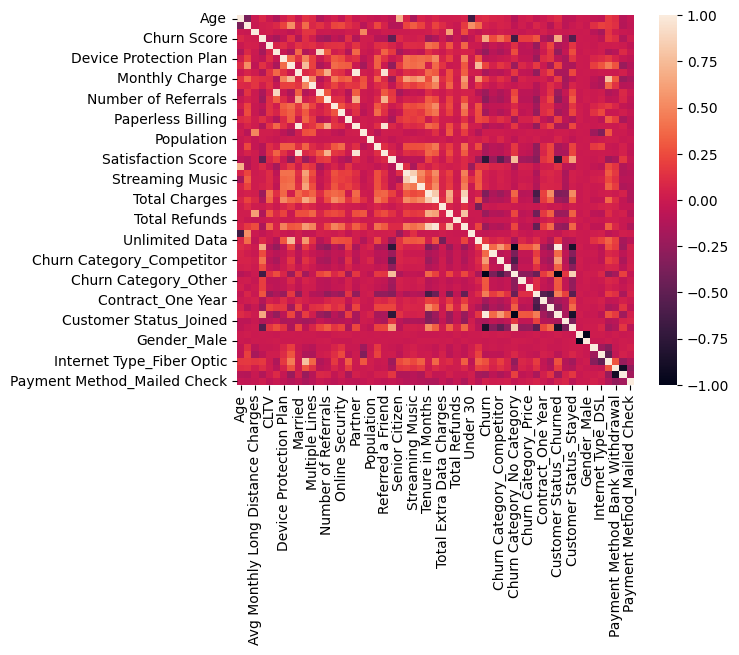

<Figure size 640x480 with 0 Axes>

In [14]:
heatmap = sns.heatmap(encoded_train_data.corr())
plt.show()
plt.savefig("./figs/heatmap-1.png")

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1409 non-null   int64  
 1   Avg Monthly GB Download            1409 non-null   int64  
 2   Avg Monthly Long Distance Charges  1409 non-null   float64
 3   Churn Category                     374 non-null    object 
 4   Churn Reason                       374 non-null    object 
 5   Churn Score                        1409 non-null   int64  
 6   City                               1409 non-null   object 
 7   CLTV                               1409 non-null   int64  
 8   Contract                           1409 non-null   object 
 9   Country                            1409 non-null   object 
 10  Customer ID                        1409 non-null   object 
 11  Customer Status                    1409 non-null   objec

In [16]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1409 non-null   int64  
 1   Avg Monthly GB Download            1409 non-null   int64  
 2   Avg Monthly Long Distance Charges  1409 non-null   float64
 3   Churn Category                     374 non-null    object 
 4   Churn Reason                       374 non-null    object 
 5   Churn Score                        1409 non-null   int64  
 6   City                               1409 non-null   object 
 7   CLTV                               1409 non-null   int64  
 8   Contract                           1409 non-null   object 
 9   Country                            1409 non-null   object 
 10  Customer ID                        1409 non-null   object 
 11  Customer Status                    1409 non-null   objec

In [17]:
train_data.isnull().sum()

Age                                    0
Avg Monthly GB Download                0
Avg Monthly Long Distance Charges      0
Churn Category                         0
Churn Score                            0
CLTV                                   0
Contract                               0
Customer Status                        0
Dependents                             0
Device Protection Plan                 0
Gender                                 0
Internet Service                       0
Internet Type                        886
Married                                0
Monthly Charge                         0
Multiple Lines                         0
Number of Dependents                   0
Number of Referrals                    0
Online Backup                          0
Online Security                        0
Paperless Billing                      0
Partner                                0
Payment Method                         0
Phone Service                          0
Population      

In [18]:
train_data[train_data["Internet Type"].isnull()].head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Score,CLTV,Contract,Customer Status,Dependents,Device Protection Plan,...,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Churn
2,59,0,16.07,No Category,59,5092,Month-to-Month,Stayed,0,0,...,0,46,851.20,0,739.22,0.00,1590.42,0,0,0
20,46,0,43.80,No Category,46,4691,One Year,Stayed,0,0,...,0,32,624.15,0,1401.60,0.00,2025.75,0,0,0
24,48,0,19.28,No Category,57,5190,Two Year,Stayed,1,0,...,0,12,224.50,0,231.36,0.00,455.86,0,0,0
25,60,0,47.46,No Category,53,3142,Month-to-Month,Stayed,0,0,...,0,6,109.20,0,284.76,0.00,393.96,0,0,0
29,34,0,40.91,No Category,79,4311,Two Year,Stayed,0,0,...,0,70,1328.35,0,2863.70,33.29,4158.76,0,0,0


In [19]:
train_data["Churn"].unique()

array([0, 1])

In [20]:
train_data["Churn"].value_counts()

Churn
0    3104
1    1121
Name: count, dtype: int64

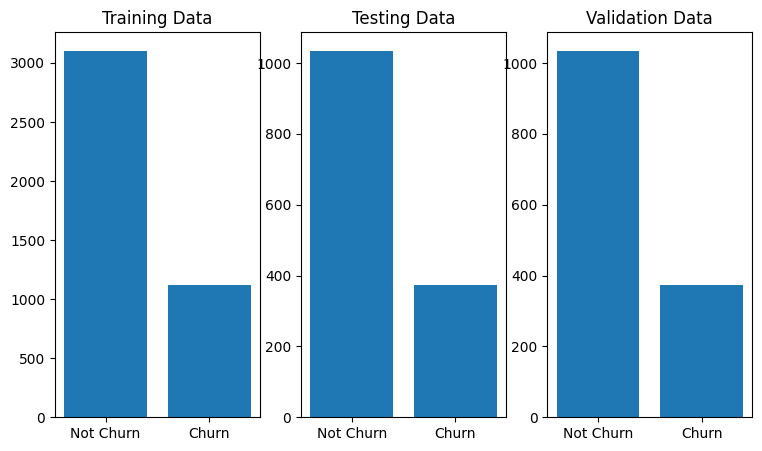

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,5))
axes[0].bar(["Not Churn","Churn"], train_data["Churn"].value_counts())
axes[0].set_title("Training Data")
axes[1].bar(["Not Churn","Churn"], test_data["Churn"].value_counts())
axes[1].set_title("Testing Data")
axes[2].bar(["Not Churn","Churn"], validation_data["Churn"].value_counts())
axes[2].set_title("Validation Data")
fig.savefig("./figs/fig-1.png")